# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
# Library to supress warnings
import warnings     
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library to help with visualization of the data
import seaborn as sns

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

### Loading the dataset

In [3]:
# Load the original data
df_Boston = pd.read_csv('Boston.csv')

In [4]:
# Create a copy of the data to avoid any changes to the original data
df_data = df_Boston.copy()

## Data Overview

- Observations
- Sanity checks

In [5]:
# Find out the size of the dataset
print(f"There are {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

There are 506 rows and 13 columns.


In [6]:
# Familiarize yourself with the data by observing the first 5 records apropriately loaded
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
# Familiarize yourself with the data by observing the last 5 records apropriately loaded
df_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [8]:
# Identify unique values per column to assess if all the columns are needed for the model
df_data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

In [9]:
# Let's find out some more information about the dataset, the total number of observations,columns and their data types,
# and if there are any missing values (non-null)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [10]:
# Get a sense of thedata in each column by looking at the summary of statistics

df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [11]:
# Identify if there are any duplicates in the dataset
df_data[df_data.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


**Observations:**

* The dataset consists of 506 observations (rows) and 13 columns (features).
* By looking at the first and last five records allows us to get a sense that the data seems in good shape to carry on with the analysis.
* All columns have 506 non-null values i.e. **There are no missing values in the dataset.**
* All columns are numerical
* There are **no duplicate rows** in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

### Univariate Analysis

CRIM
Skew : 5.22


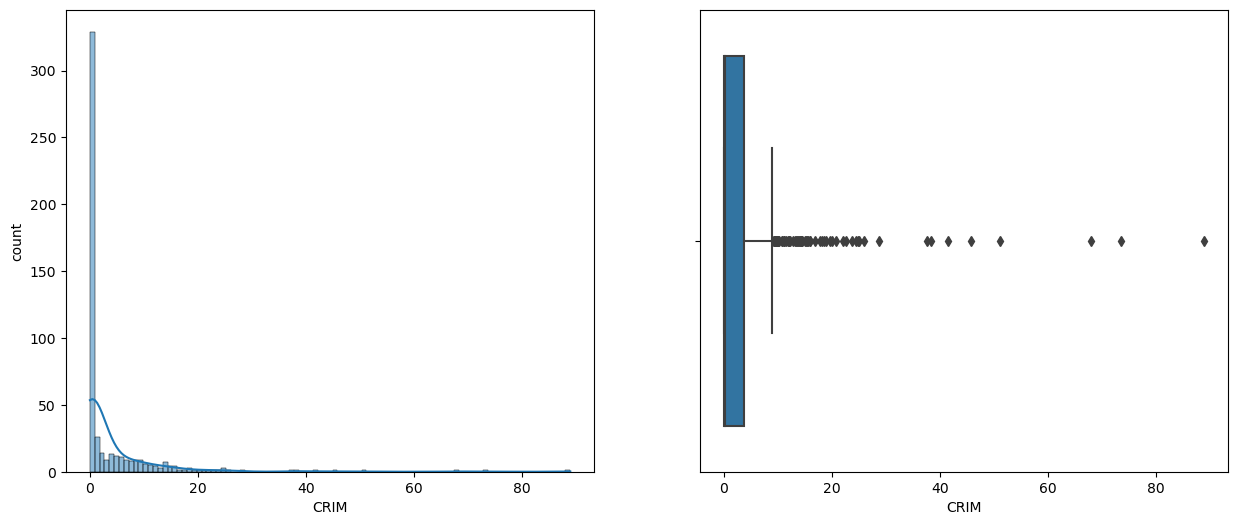

ZN
Skew : 2.23


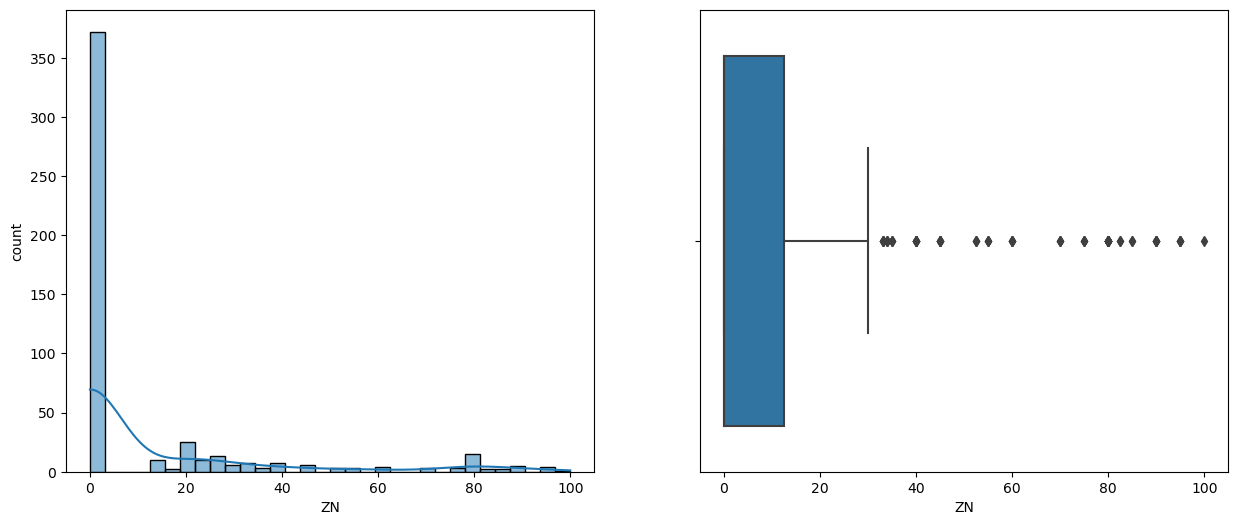

INDUS
Skew : 0.3


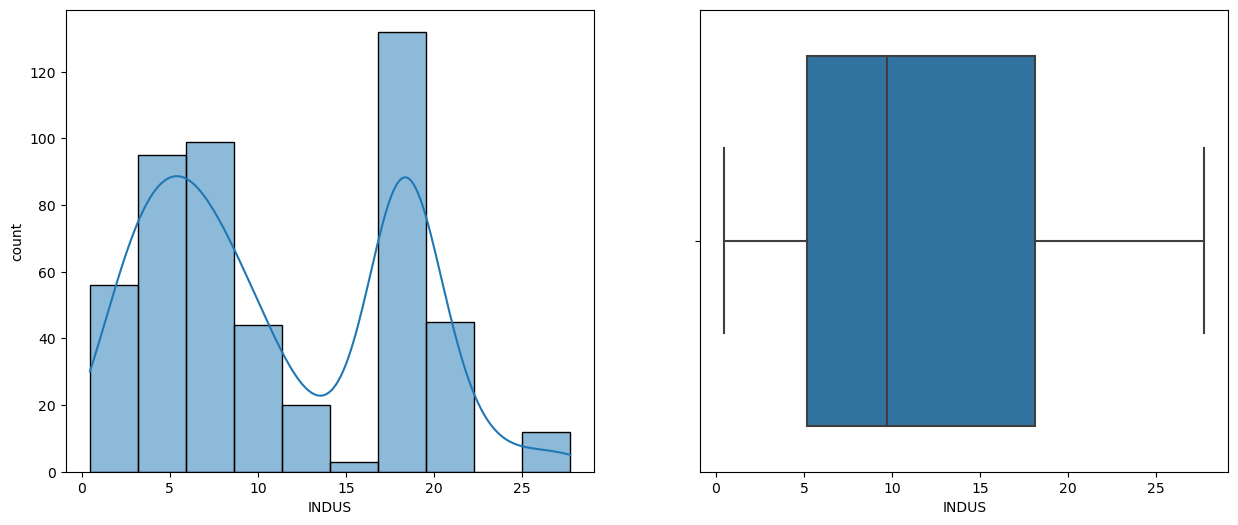

CHAS
Skew : 3.41


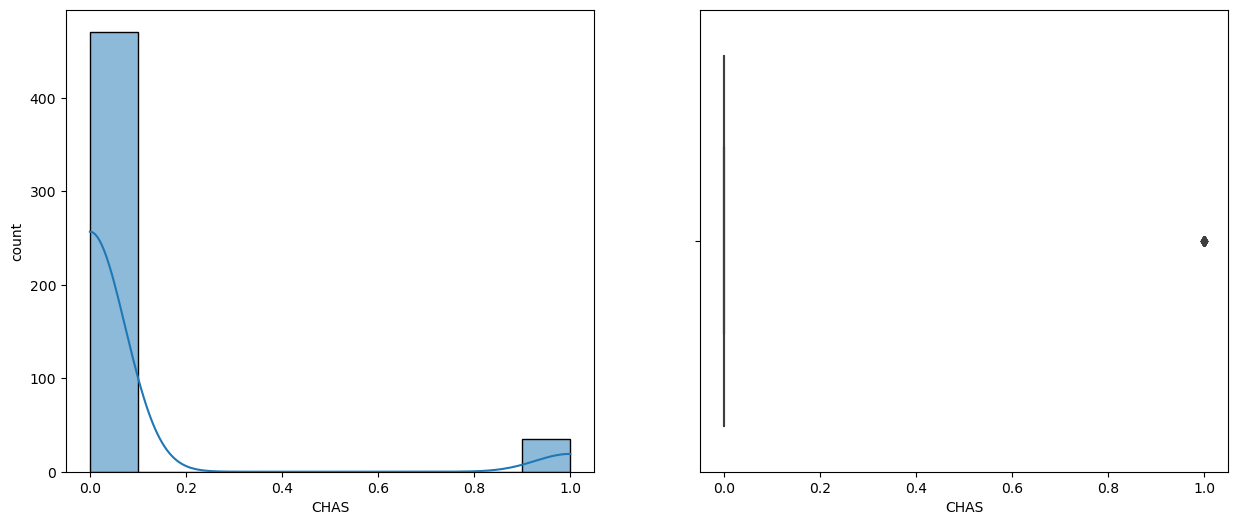

NOX
Skew : 0.73


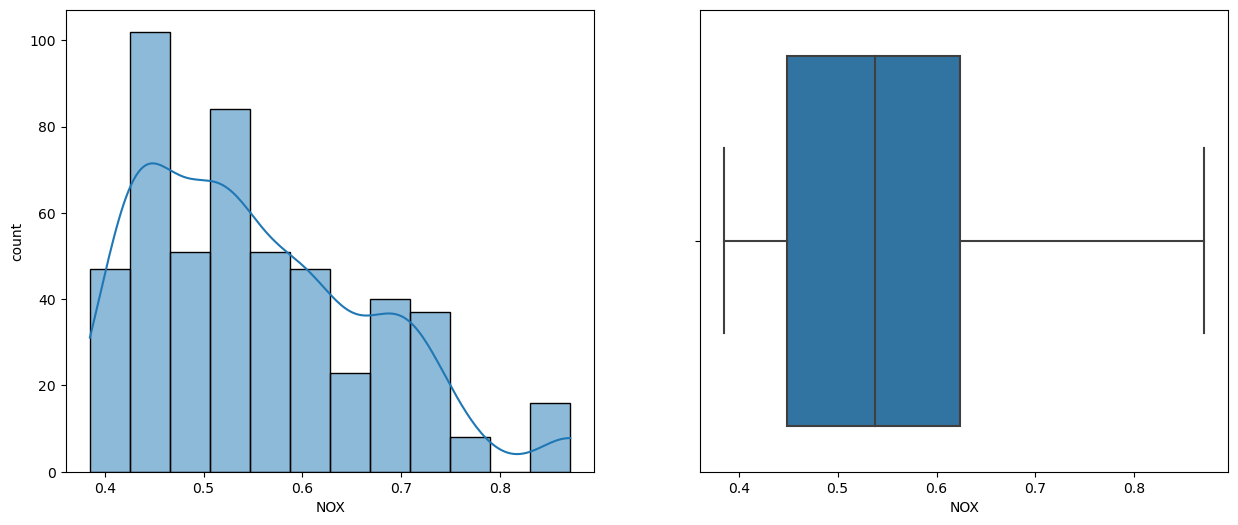

RM
Skew : 0.4


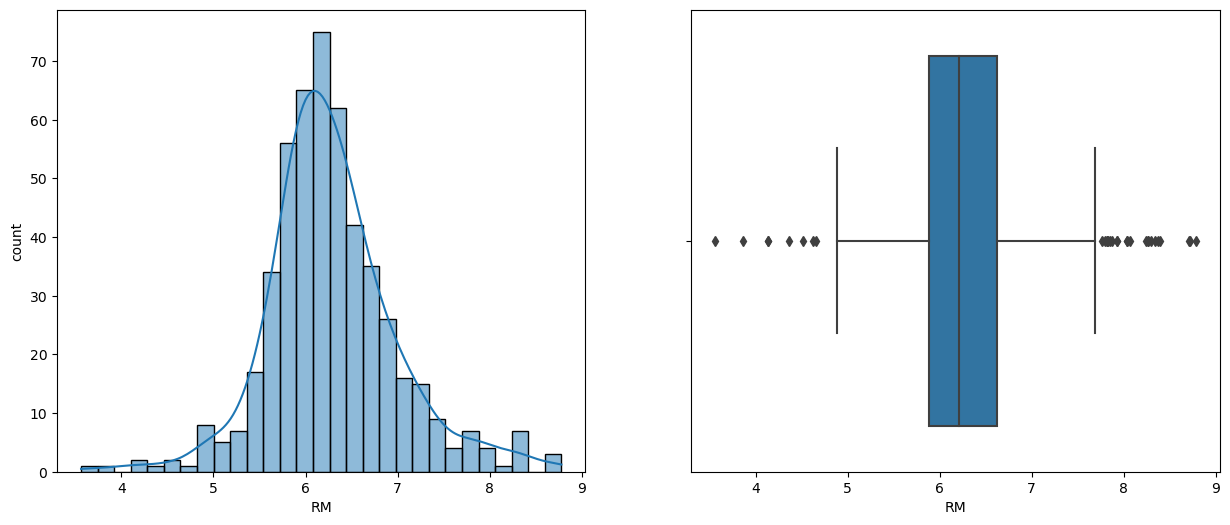

AGE
Skew : -0.6


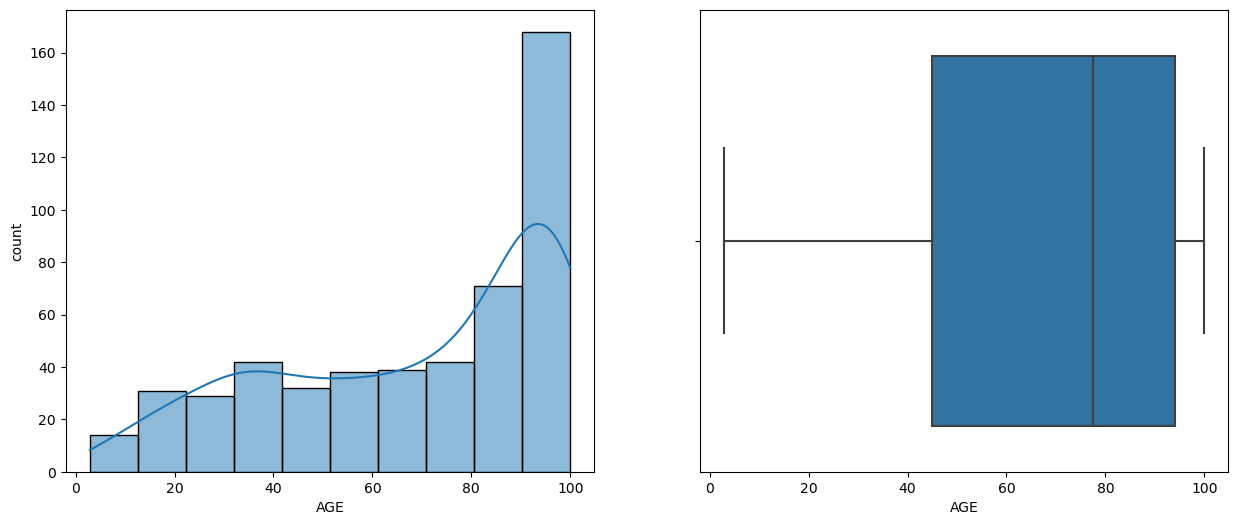

DIS
Skew : 1.01


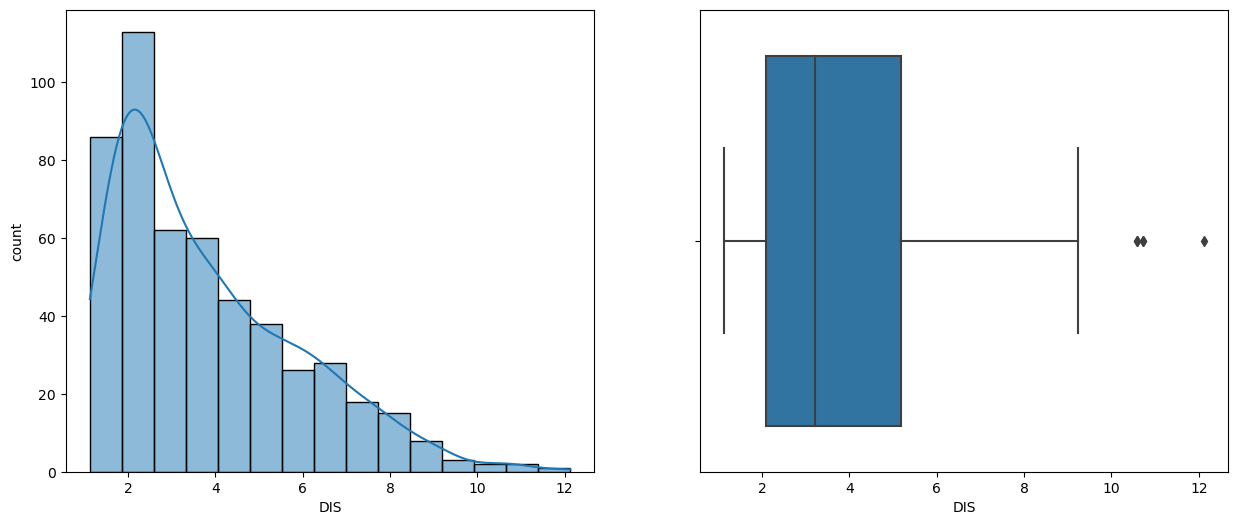

RAD
Skew : 1.0


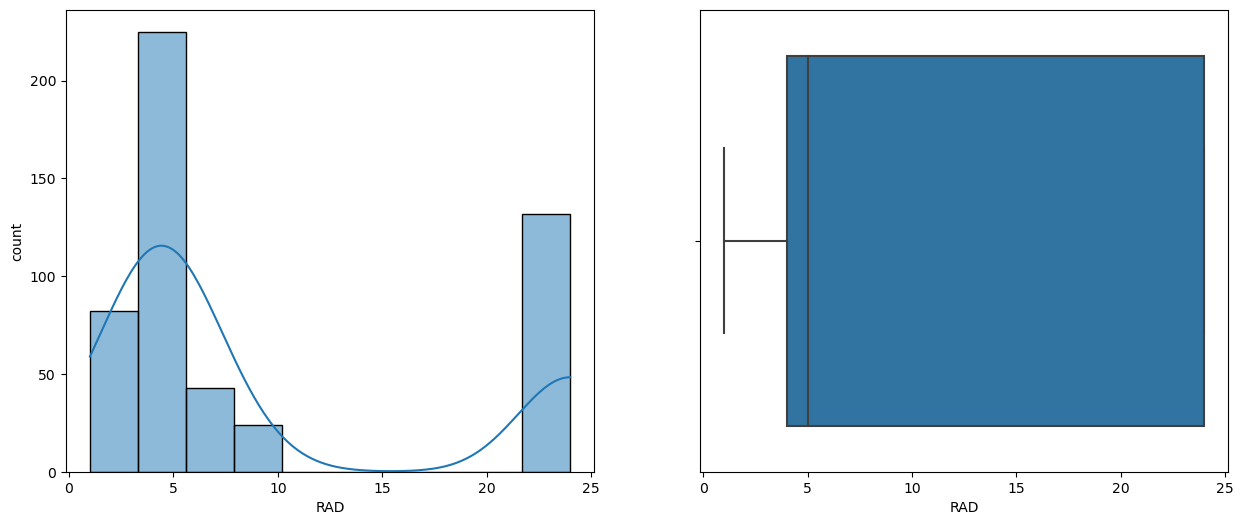

TAX
Skew : 0.67


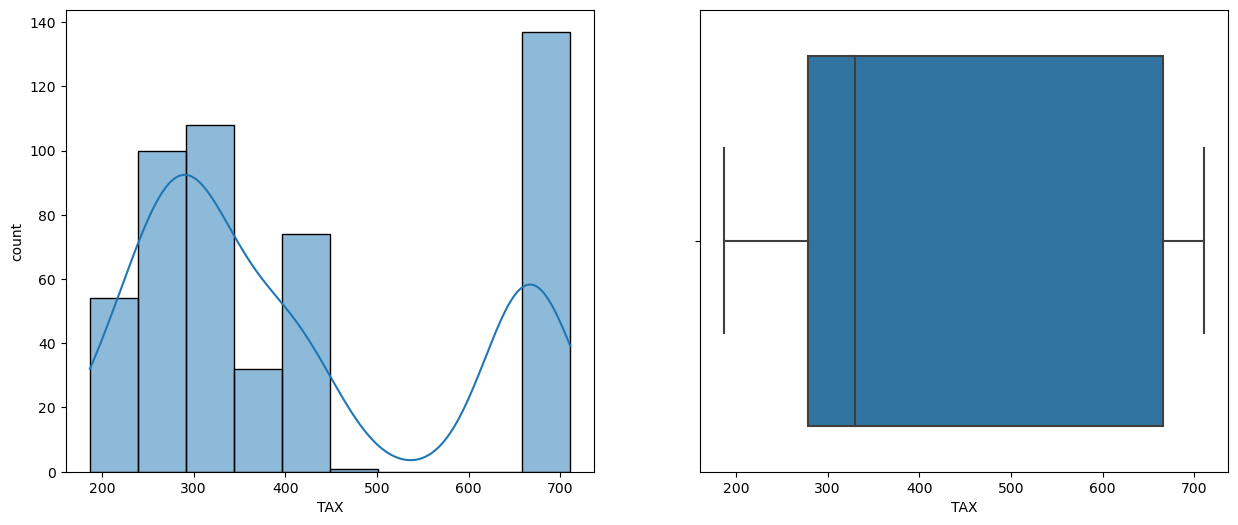

PTRATIO
Skew : -0.8


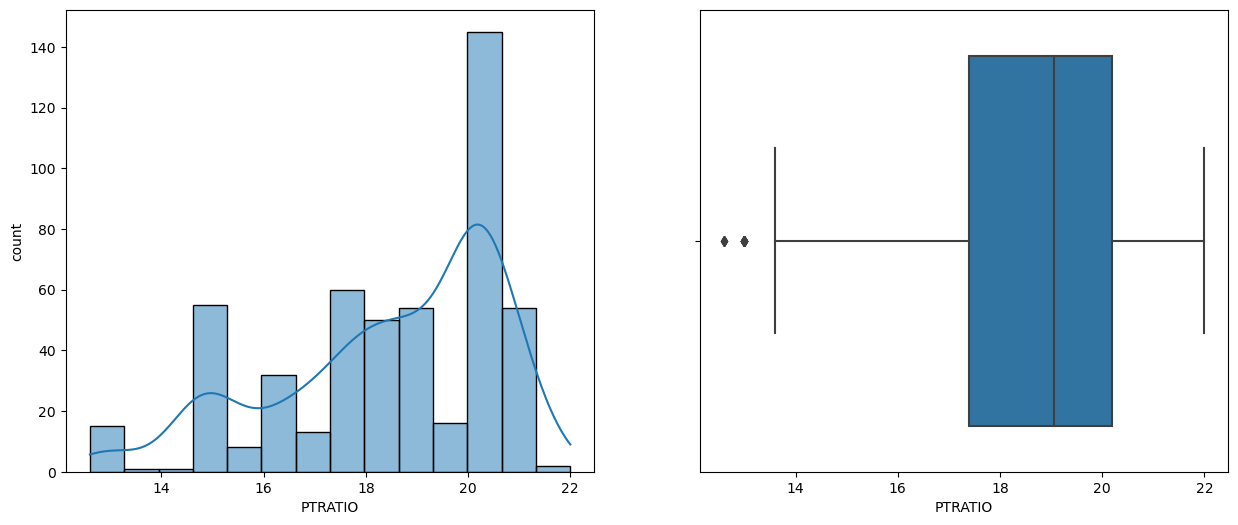

LSTAT
Skew : 0.91


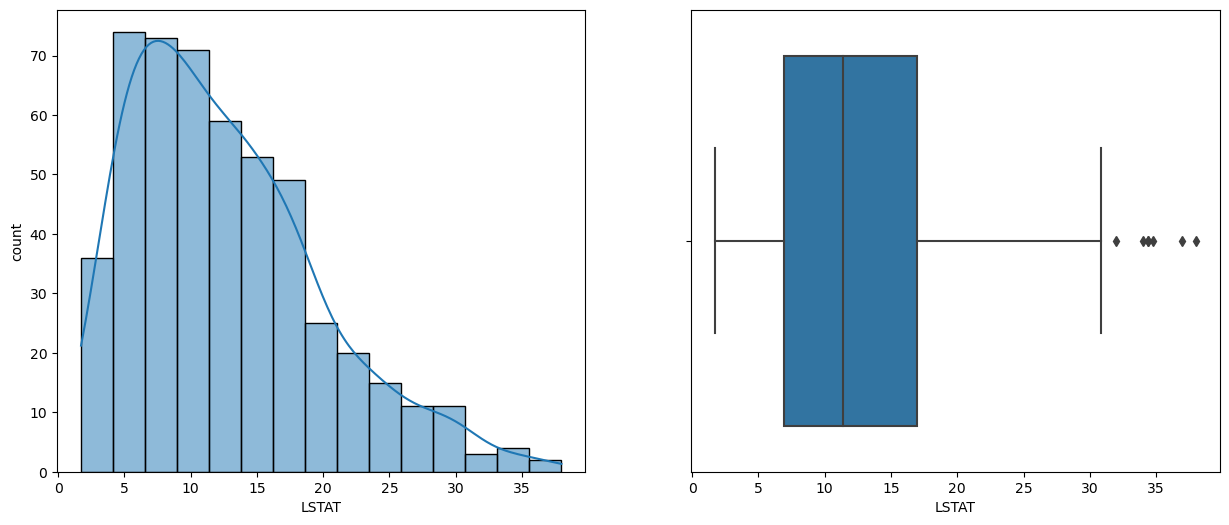

MEDV
Skew : 1.11


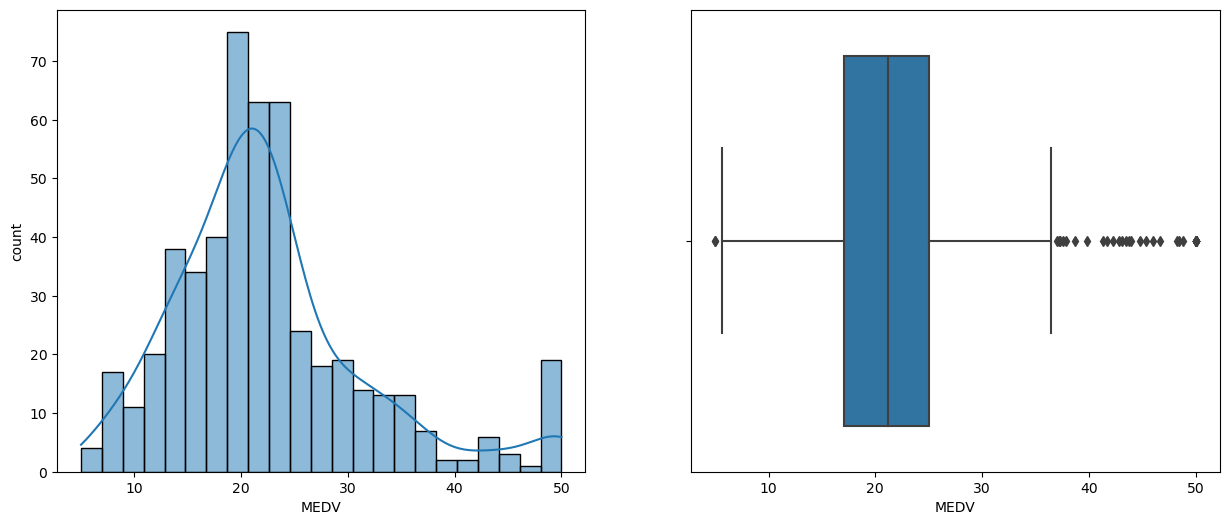

In [12]:
    cont_cols = list(df_data.columns)

    for col in cont_cols:

        print(col)
        print('Skew :',round(df_data[col].skew(),2))
        plt.figure(figsize = (15, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(data = df_data, x= col, kde = True)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x = df_data[col])

        plt.show()



**See in the above cell** how the <a id='MEDV_Skew'></a>**MEDV Median value of owner-occupied homes in 1000 dollars** is skewed to the right. As this is our **dependent variable** we will need to create a **log transformation** in order to create a more normally distributed  variable. We will action this transformation as part of the data preprocessing.

[ See Log Transformation](#log_transformation)

### Correlation Matrix

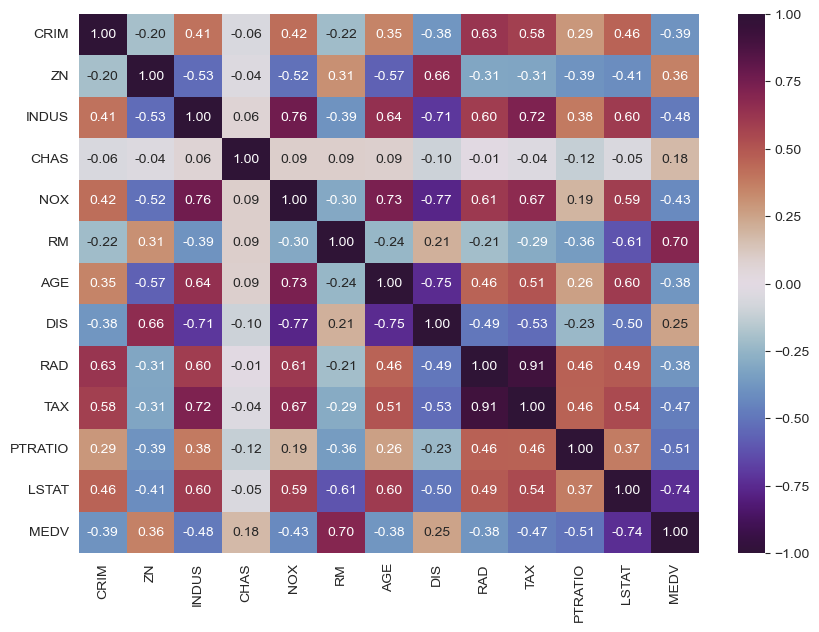

In [13]:
# Correlation plot to understand the interaction between the variables
sns.set_style('whitegrid')
cols_list = df_data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 7))
sns.heatmap(
    df_data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "twilight_shifted"
)
plt.show()

### Bivariate analysis for variables with significant correlation

The following cells show the correlations Greater or Less than 70%
**(>=0.7 or <=0.7)** as shown in the above Correlation Matrix

#### **NOX**: Nitric Oxide concentration (parts per 10 million) **vs.** **INDUS**: Proportion of non-retail business acres per town **0.76**

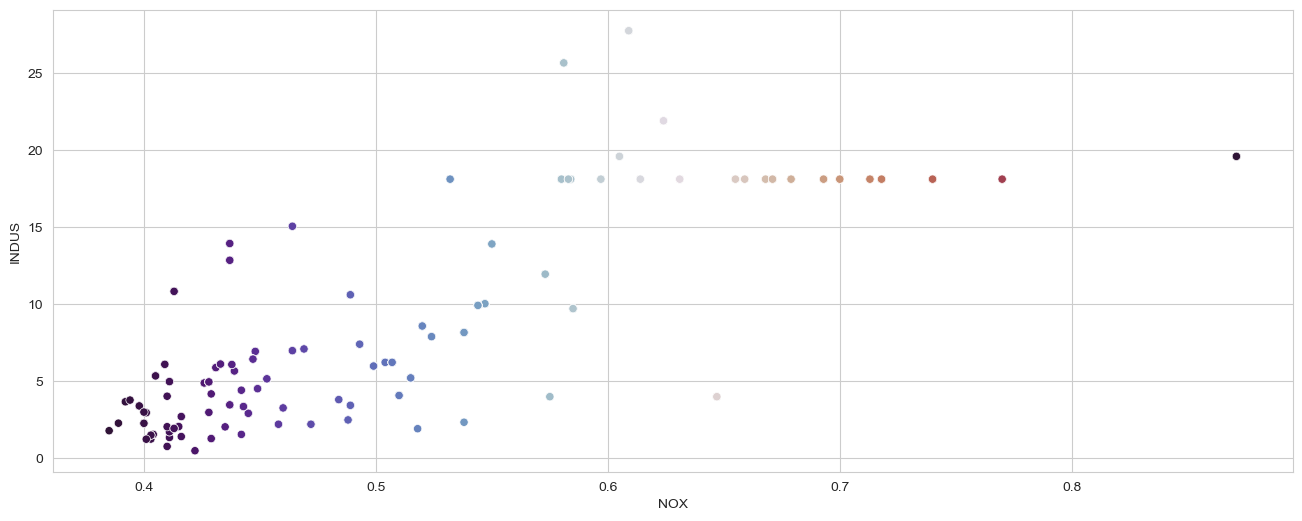

In [14]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'NOX', y = 'INDUS',
                hue='NOX', palette='twilight_shifted', legend=False )

plt.show()

#### **NOX**: Nitric Oxide concentration (parts per 10 million) **vs.** **AGE**: Proportion of owner-occupied units built before 1940 **0.73**

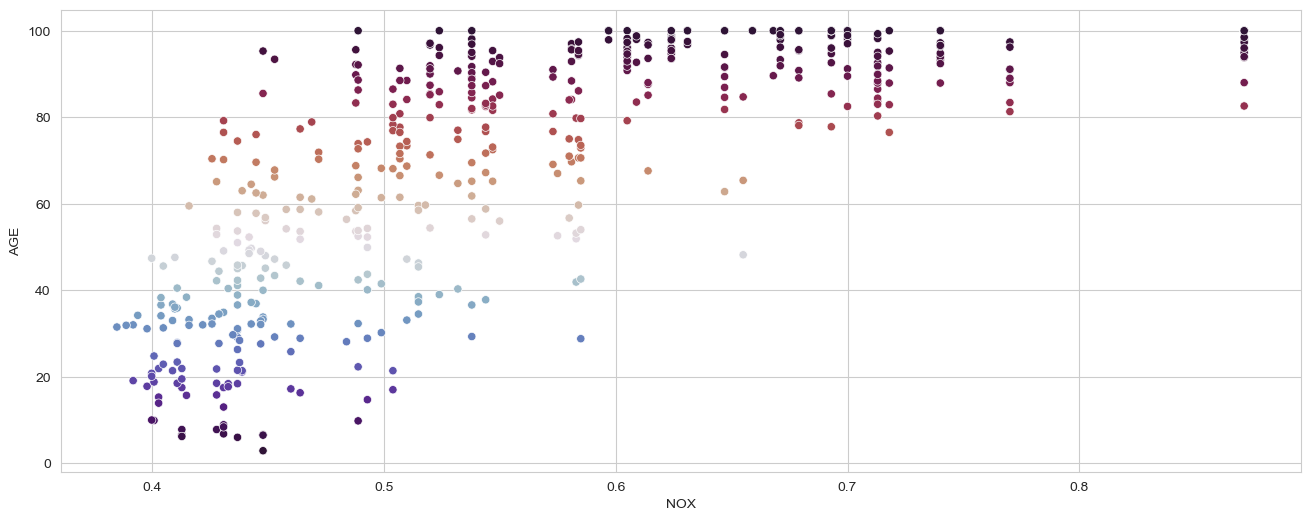

In [15]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'NOX', y = 'AGE',
                hue='AGE', palette='twilight_shifted', legend=False )

plt.show()

The Nitrix Oxide Concentration seems to have a high correlation with the Proportion of non-retail business and the proportion of owner-occupied units built before 1940. This might be due to the fact that the area in the 1940's might have been more industrial, therefore affecting the Nitrix Oxide Concentration and also having a positive influence in the occupacy of the area as people wanted to live near where they worked.

#### **NOX**: Nitric Oxide concentration (parts per 10 million) **vs.** **DIS**: Weighted distances to five Boston employment centers **-0.77**

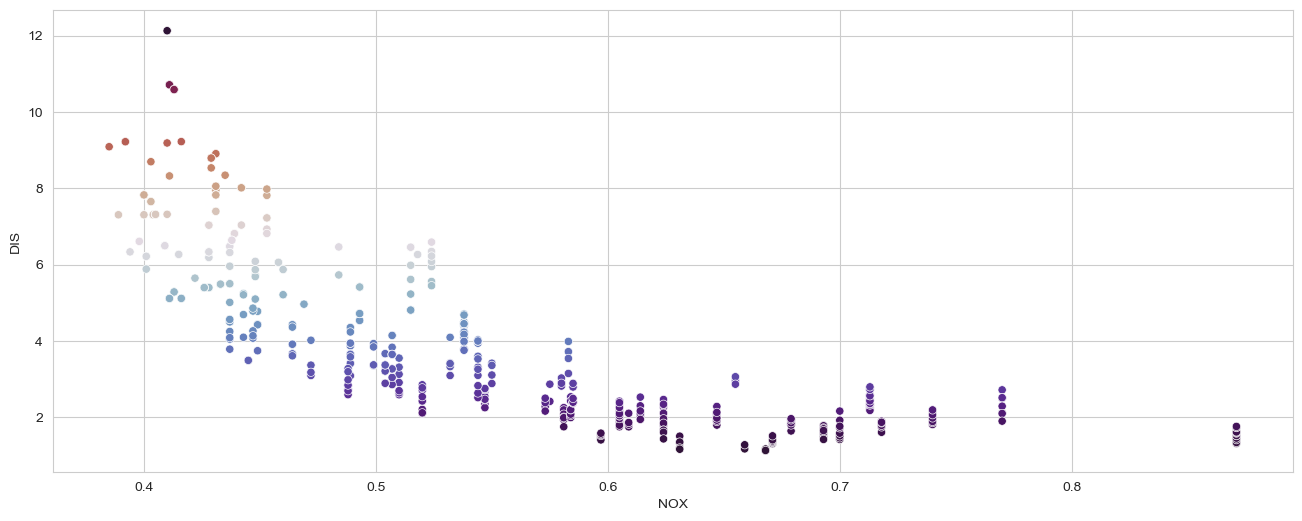

In [16]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'NOX', y = 'DIS',
                hue='DIS', palette='twilight_shifted', legend=False )

plt.show()

#### **AGE**: Proportion of owner-occupied units built before 1940 **vs.** **DIS**: Weighted distances to five Boston employment centers **-0.75**

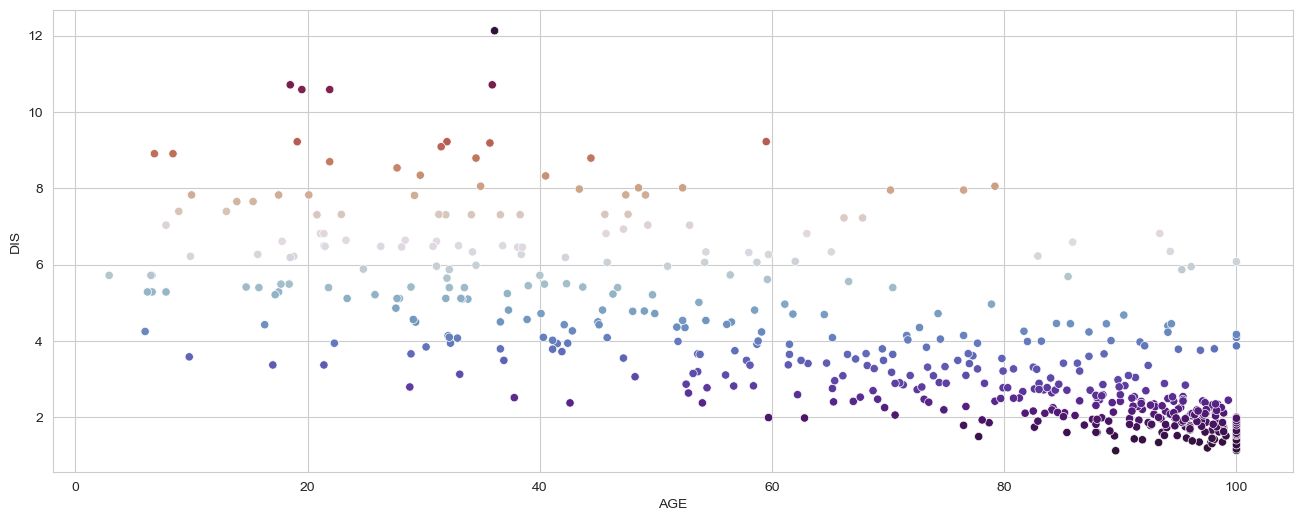

In [17]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'AGE', y = 'DIS',
                hue='DIS', palette='twilight_shifted', legend=False )

plt.show()

There seems to be a negative correlation between the age proportion of owner-occupied units and the distance to employment centers. This might be due to the fact that the employment ceters could potentially be located in more afluent areas with high correlation.

#### **RAD**: Index of accessibility to radial highways **vs.** **TAX**: Full-value property-tax rate per 10,000 dollars **0.91**

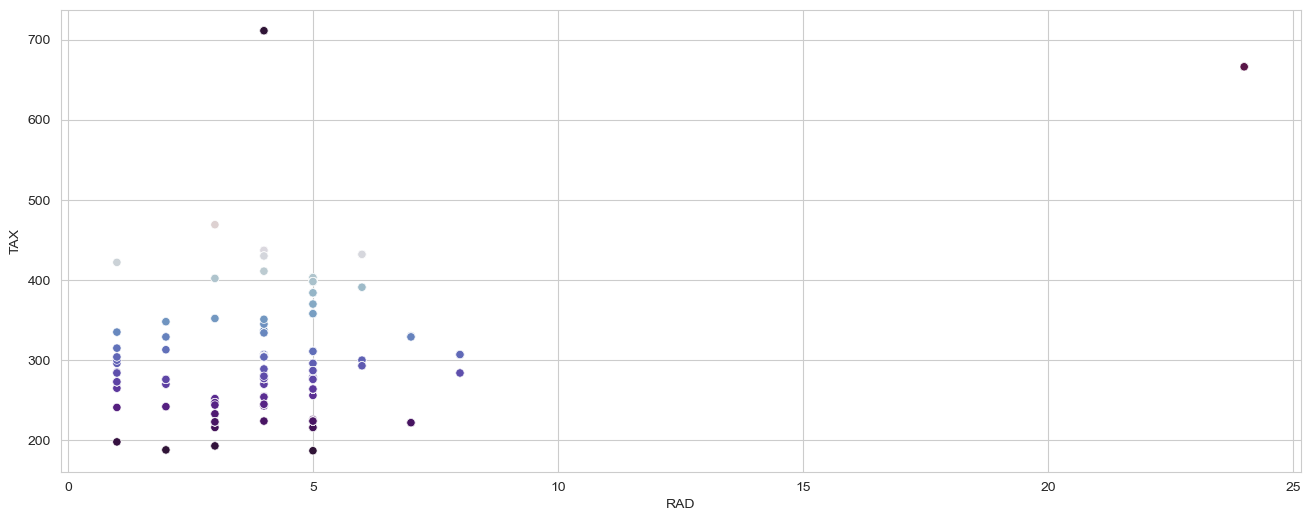

In [18]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'RAD', y = 'TAX',
                hue='TAX', palette='twilight_shifted', legend=False )

plt.show()

There see ms to be a strage corrlation between RAD and TAX with no clear trend. This might be due to outliers in both variables.

#### **TAX**: Full-value property-tax rate per 10,000 dollars **vs.** **INDUS**: Proportion of non-retail business acres per town **0.72**

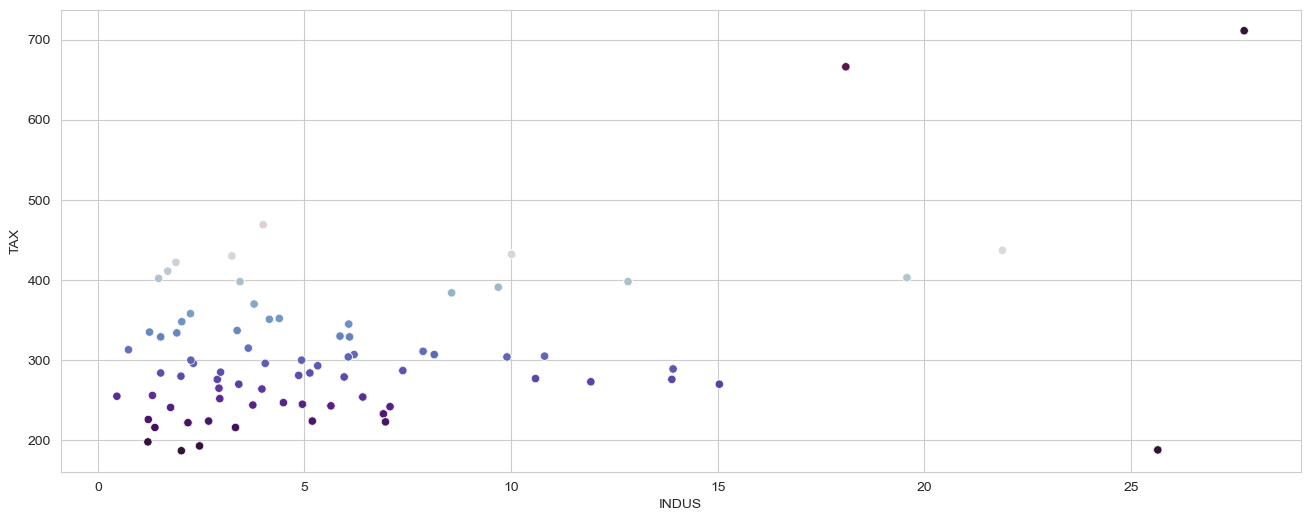

In [19]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'INDUS', y = 'TAX',
                hue='TAX', palette='twilight_shifted', legend=False )

plt.show()

There is a strong correlation between the non-retails business acres per town and the tax meaning that the more non-retail business the more TAX. However, there is no clear trend in the plot alos showing outliars in both varibles. So there can be other factors that can affectthis correlation.

#### **LSTAT**: % lower status of the population **vs.** **MEDV**: Median value of owner-occupied homes in 1000 dollars **-0.74**

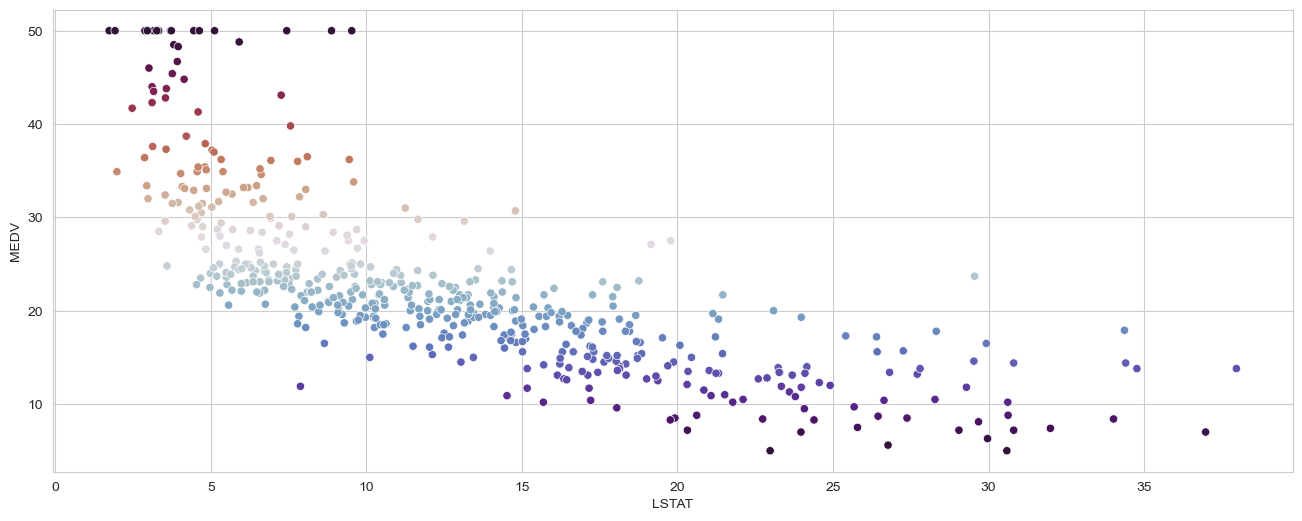

In [20]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'LSTAT', y = 'MEDV',
                hue='MEDV', palette='twilight_shifted', legend=False )

plt.show()

This negative correlation can be derived from areas where there is lower income and therefore lowe value of property

#### **MEDV**: Median value of owner-occupied homes in 1000 dollars **vs.** **RM**: The average number of rooms per dwelling **0.70**

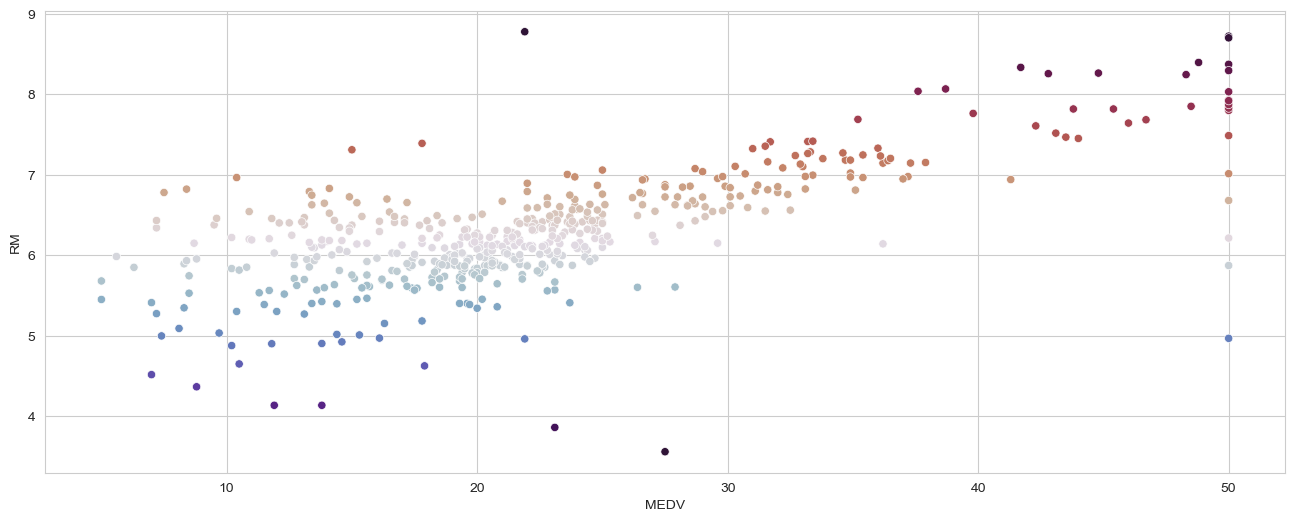

In [21]:
plt.figure(figsize = (16, 6))
sns.scatterplot(data = df_data, x = 'MEDV', y = 'RM',
                hue='RM', palette='twilight_shifted', legend=False )

plt.show()

There seems to be a direct correlation between the number of room and the value of the property.The more rooms the more value.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Log Transformation of the dependent variable**<a id='log_transformation'></a>

As the dependent variable is skewed to the right, we need to replace the values of the **MEDV** in the dataset for **log(MEDV)** to normalize the distribution.

[See Univariate Analysis](#MEDV_Skew) for visual reference.

In [22]:
df_data['log_MEDV'] = np.log(df_data['MEDV'])

<AxesSubplot:xlabel='log_MEDV', ylabel='Count'>

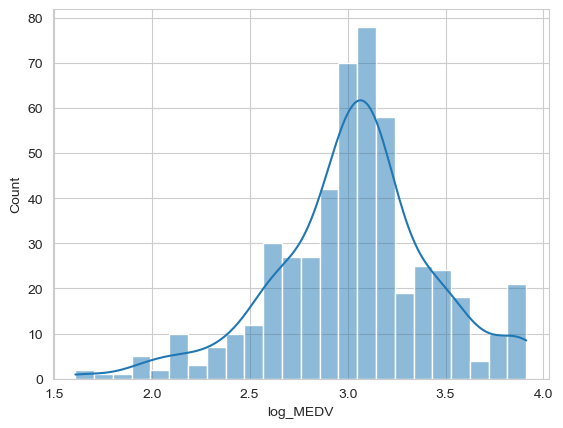

In [23]:
sns.histplot(data = df_data, x = 'log_MEDV', kde = True)

In [24]:
#Check the dataset with the new value
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.006320,0.082045,0.256510,3.677083,88.976200
ZN,506.0,11.363636,23.322453,0.000000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136779,6.860353,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253994,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574901,28.148861,2.900000,45.025000,77.500000,94.075000,100.000000
DIS,506.0,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


## Model Building - Linear Regression

### **Data Preparation for modeling**

- We want to predict the Median value of owner-occupied homes in 1000 dollars : 'MEDV'
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [25]:
# Drop the columns not needed in the dataset for the independent varialble
X = df_data.drop(columns = {'MEDV', 'log_MEDV'})

# Separate the dependent variable
Y = df_data['log_MEDV']

# Add the intercept term
X = sm.add_constant(X)

# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the training data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
- RAD and TAX have a VIF score greater than 5. We will now drop TAX and check multicoliniarity again.

In [27]:
# Drop TAX from tha training dataset
X_train = X_train.drop(columns = 'TAX')

# Check multicollinearity again
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


We can now see that the VIF score is less than 5 for all the independent variables. We will now go ahead and **create the Linear Regression model**.

In [28]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 25 May 2023   Prob (F-statistic):          1.40e-101
Time:                        19:21:34   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

In [29]:
# Identify the current columns in the dataset to drop the ones with irrelevant regression coefficient
df_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'log_MEDV'],
      dtype='object')

In [30]:
# Drop the columns not needed in the dataset for the independent varialble
X = df_data.drop(columns = ['MEDV', 'log_MEDV','TAX', 'ZN', 'AGE', 'INDUS'])

# Separate the dependent variable
Y = df_data['log_MEDV']

# Add the intercept term
X = sm.add_constant(X)

# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [31]:
# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
# model2.summary()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 25 May 2023   Prob (F-statistic):          2.61e-104
Time:                        19:21:34   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

**Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly**

In [32]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, X_train, X_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(X_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(X_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                
                ],
                
                "MAPE": [
                    mean_absolute_percentage_error(y_pred_train, y_observed_train),
                    mean_absolute_percentage_error(y_pred_test, y_observed_test),
                
                ],
                
            }
        )
    )

In [33]:
# Model 1 exclude 'TAX' as it has a VIF score > 5
# Create the model
model1 = sm.OLS(y_train, X_train).fit()
model_pref(model1,X_train,X_test)

    Data      RMSE       MAE        r2      MAPE
0  Train  0.195504  0.143686  0.696514  0.049544
1   Test  0.198045  0.151284  0.647196  0.051121


In [34]:
# Model 2 excludes 'ZN', 'AGE', 'INDUS the columns not needed in the dataset for the independent varialble
# Create the model
model2 = sm.OLS(y_train, X_train).fit()
model_pref(model2,X_train,X_test)

    Data      RMSE       MAE        r2      MAPE
0  Train  0.195504  0.143686  0.696514  0.049544
1   Test  0.198045  0.151284  0.647196  0.051121


In [35]:
# Check multicollinearity again
print(checking_vif(X_train))

   feature         VIF
0    const  526.961418
1     CRIM    1.892679
2     CHAS    1.049602
3      NOX    3.528194
4       RM    1.748438
5      DIS    2.582254
6      RAD    2.838523
7  PTRATIO    1.591527
8    LSTAT    2.437311


Now that we have dropped all the features not required for the model, we can see that the Variance Inflation Factor is acceptable to continue our next step of checking the Assumptions for Linear Regression.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### Mean of residuals should be nil

In [36]:
# Residuals
residual = model2.resid 

In [37]:
residual.mean()

-1.549921521948453e-15

The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### Test for Normality

* Residuals should be normally distributed.
* If the residuals are non-normally distributed, confidence intervals may become too wide or narrow. Once the confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on the minimization of least squares.

<AxesSubplot:ylabel='Count'>

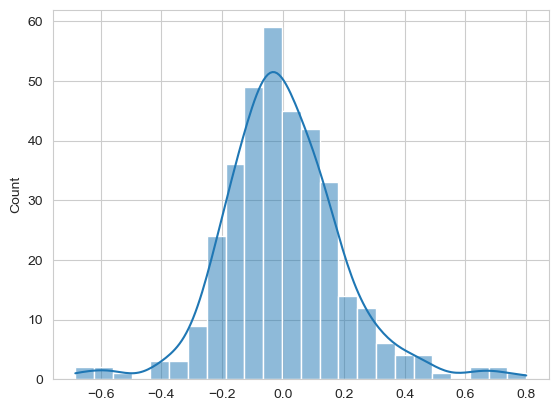

In [38]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

The residuals are normally distributed. The assumption of normality is satisfied.

### Linearity of Variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

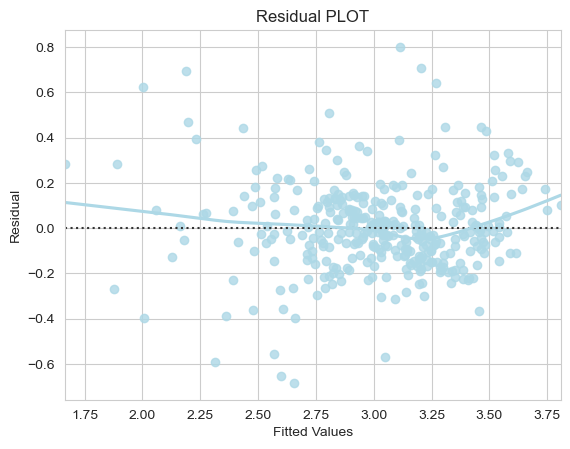

In [39]:
# Predicted values
fitted = model2.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

We can see that there is no pattern in fitted values and residuals. They are randomly and uniformily scattered on the x-axis.

### Test for Homoscedasticity

**Homoscedasticity** - If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

**Heteroscedasticity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.

We will use *Goldfeld–Quandt test* to check homoscedasticity.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals are hetroscedastic

In [40]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms


In [41]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

The p-value is greater than 0.05, so we fail to reject the null-hypothesis. **That means the residuals are homoscedastic**.

## Final Model

Once we have verified all the assumptions of the linear regression model, we can go ahead and write the **final equation of the model**:


$log ($ log_MEDV $)$ = 4.6494 + **CRIM** * -0.0125 + **CHAS** * 0.1198 + **NOX** * -1.0562 + **RM** * 0.0589 + **DIS** * -0.0441 + **RAD** * 0.0078 + **PTRATIO** * -0.0485 + **LSTAT** * -0.0293  

Check the evaluation metrics of the model:


In [42]:
model_pref(model2,X_train,X_test)

    Data      RMSE       MAE        r2      MAPE
0  Train  0.195504  0.143686  0.696514  0.049544
1   Test  0.198045  0.151284  0.647196  0.051121


**Observations:**

* **RMSE :** The model's overall error is ~20%. This is how close is the observed data to the predicted values. 

* **MAE :** The Average absolut error between the actual and predicted values is ~14% for the training data and ~15% for the test data.

* **r2 :** The R-squared metric gives us an indication that how good/bad our model is from a baseline model. Here, we have explained ~69% variance in the train data and ~64% test data as compared to the baseline model when there is no independent variable.

* **MAPE :** The average difference between the focasted value vs the actual value is 4% for the training data and 5% for the test data.  

Below, we are checking the cross-validation score to identify if the model that we have built is **underfitted**, **overfitted** or **just right fit** model.

In [43]:
# Fitting linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()                                    



cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, X_test, y_test, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.040 (+/- 0.053)


**Observations:**

The R-Squared on the cross-validation is 0.729 which is veryu similar to the R-Squared on the training dataset.
The MSE on cross-validation is 0.04 which tells us that the Actual is very close to the Forecast. This amount is also in-lin with the MAPE which is 4% for the training data and 5% for the test data.

## **Conclusions and Recommendations**

We performed EDA, univariate and bivariate analysis, on all the variables in the dataset.
We then transformed the dependent variable to normalize the distribution, and then We removed multicollinearity from the data and analyzed the model summary report to drop insignificant features.
We then started the model building process with all the most significat features features.
We checked for different assumptions of linear regression and fixed the model iteratively if any assumptions did not hold true.
Finally, we evaluated the model using various evaluation metrics different evaluation metrics and checked the cross-validation score to identify if the model is underfitted, overfitted or just right fit model.

## Actionable Insights and Recommendations 

The model equation to predic houose prices:

$log ($ log_MEDV $)$ = 4.6494 + **CRIM** * -0.0125 + **CHAS** * 0.1198 + **NOX** * -1.0562 + **RM** * 0.0589 + **DIS** * -0.0441 + **RAD** * 0.0078 + **PTRATIO** * -0.0485 + **LSTAT** * -0.0293  

In [44]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [45]:
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:5]

array([3.35544059, 3.2550555 , 2.88273424, 3.15409064, 2.92352382])

In [46]:
expected[:5]

307    3.339322
343    3.173878
47     2.809403
67     3.091042
362    3.034953
Name: log_MEDV, dtype: float64

- We can see that the predicted and expected amounts are really close for the first 5 predictions of the dataset.

- Based on the equation, We can clearly assess that the most important features that affect the price of houses are:
    * CHAS : Charles River dummy variable 
    * RM : The average number of rooms per dwelling
    * RAD : Index of accessibility to radial highways
- From the above equation, we can suggest that, in order for us to predict the log price of the **Median value of owner-occupied homes in 1000 dollar** with one unit change in the variable **CHAS - Charles River dummy variable**, the outcome variable, the log of **MEDV** increases by 0.12 units. 

___